In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = '/data/bci_original/'
#data_dict = mat73.loadmat(path+'Copy of combined_behavior.mat')
data_dict = mat73.loadmat(path+'Copy of combined_new_old2.mat')

/tmp/ipykernel_76/2573234880.py:33: RuntimeWarning: invalid value encountered in scalar divide
  spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])


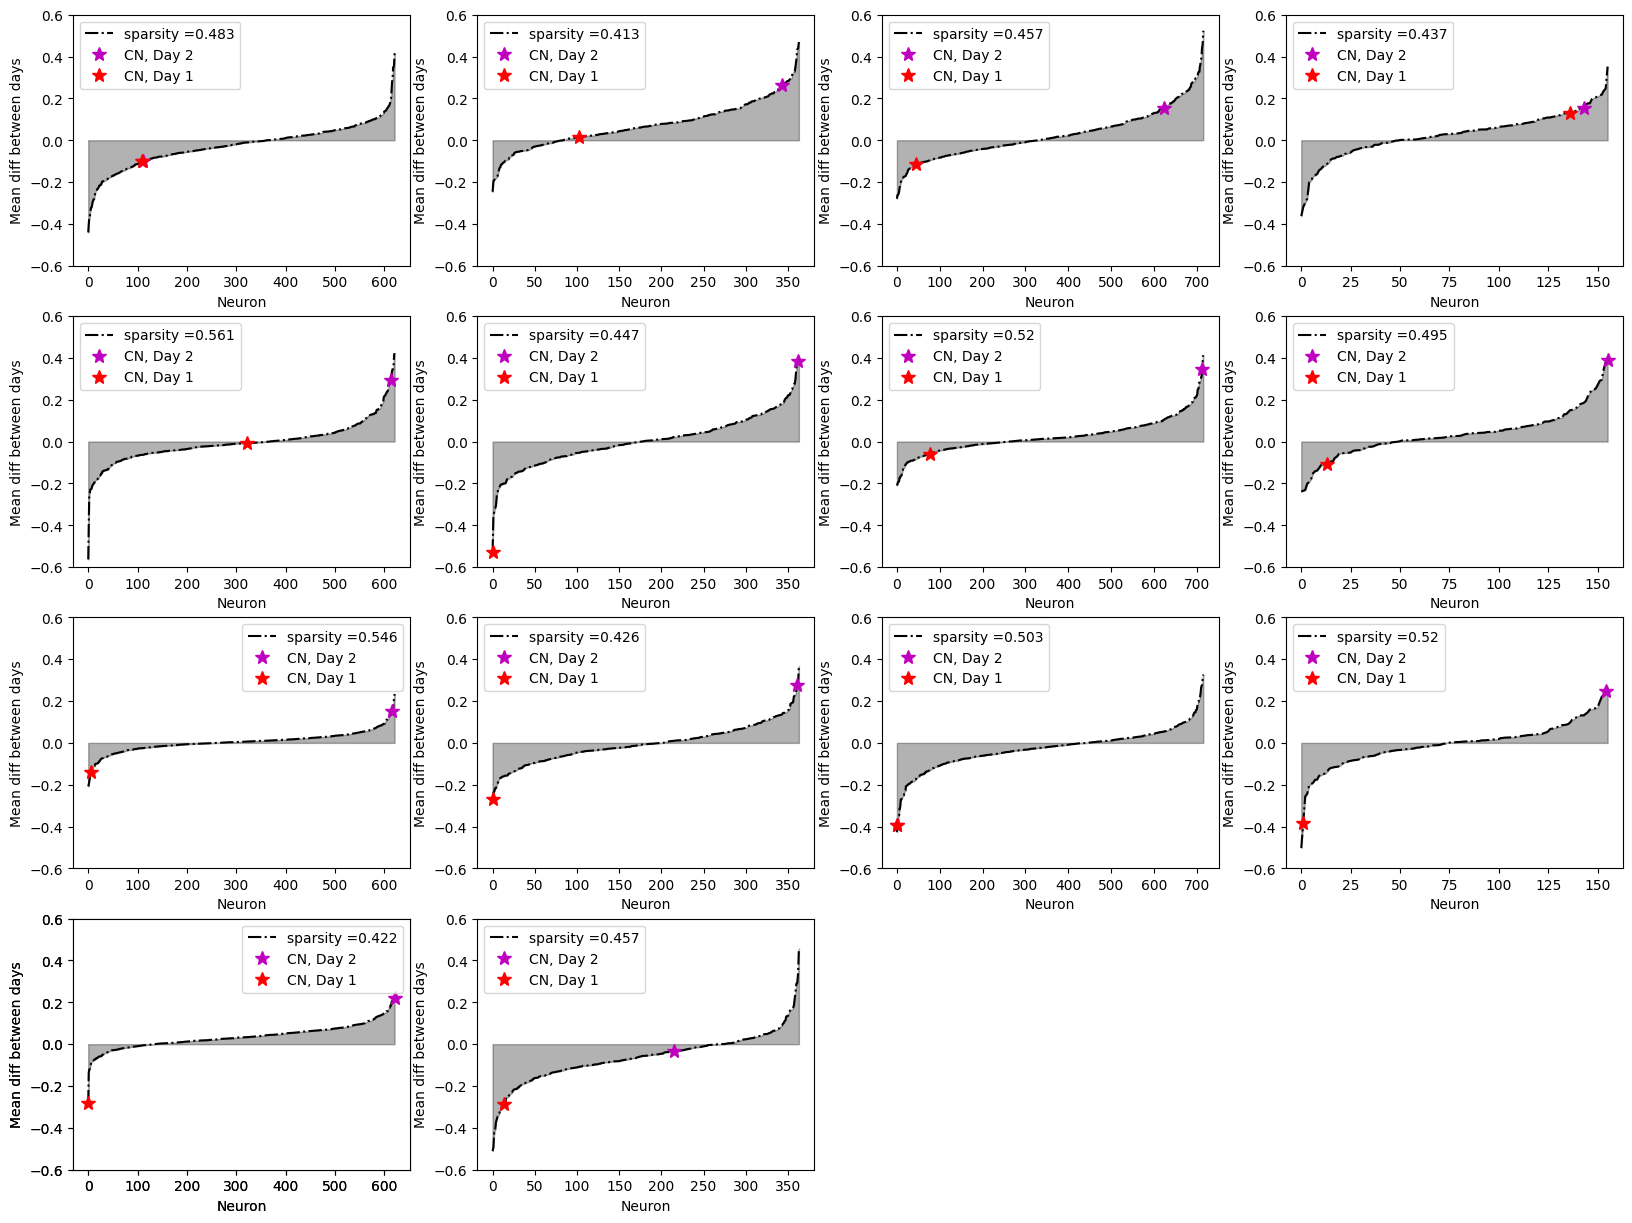

In [2]:
from matplotlib.gridspec import GridSpec as gs
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster import hierarchy
ses = data_dict['data']['session']
mouse = data_dict['data']['mouse']
keepses = [s != None for s in ses]
mouseold = mouse[0]
Fpre = data_dict['data']['F'][0]
neuronold = int(data_dict['data']['conditioned_neuron'][0]-1)
testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
rowplot = -1
colplot = 0
fig = plt.figure(figsize = [20,15])
gsx = gs(nrows = 4, ncols = 4, figure=fig)
for i in range(len(keepses)):
  if keepses[i]:
    session = i
    if mouse[i] == mouseold:
      rowplot += 1
    else:
      rowplot = 0
      colplot += 1
    session = i
    Fpre = data_dict['data']['F'][session]
    neuron = int(data_dict['data']['conditioned_neuron'][session]-1)
    test = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    test2 = test-np.mean(test[:,0:45], axis = 1)[:, None]
    #ax.plot([0,250], [order[neuron], order[neuron]], '--m')
    if mouse[i] == mouseold:
      ax = fig.add_subplot(gsx[rowplot-1, colplot+0])
      diffFR = np.mean(test2-testold2, axis = 1)
      spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
      ax.plot(range(diffFR.shape[0]), np.sort(diffFR), '-.k', label = 'sparsity =' + str(np.round(spar,3)))
      order = np.argsort(diffFR)
      ax.fill_between(range(diffFR.shape[0]), 0*diffFR, diffFR[order], color='k', alpha = 0.3)
      neurank = np.where(order == neuron)[0]
      neurankold = np.where(order == neuronold)[0]
      ax.plot([neurank], diffFR[order][neurank], '*m', label='CN, Day 2', markersize = 10)
      ax.plot([neurankold], diffFR[order][neurankold], '*r', label = 'CN, Day 1', markersize = 10)
      ax.set_ylim([-0.6,0.6])
      ax.set_xlabel('Neuron')
      ax.set_ylabel('Mean diff between days')
      ax.legend(loc='best')

    Fpre = data_dict['data']['F'][session]
    neuronold = int(data_dict['data']['conditioned_neuron'][session]-1)
    testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
    mouseold = mouse[i]
  #ax.set_ylabel('Number of time steps in Pretrial')
  #ax.set_xlabel('Trial Count')

plt.show()

/tmp/ipykernel_76/881595335.py:32: RuntimeWarning: invalid value encountered in scalar divide
  spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
/tmp/ipykernel_76/881595335.py:39: RuntimeWarning: invalid value encountered in scalar divide
  spar = 1-((np.sum(diffFRm**2)/(np.sum(np.abs(diffFRm))**2))**-1/diffFRm.shape[0])


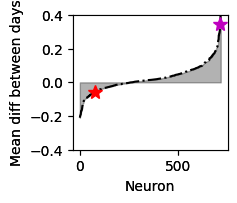

In [59]:
from matplotlib.gridspec import GridSpec as gs
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster import hierarchy
ses = data_dict['data']['session']
mouse = data_dict['data']['mouse']
keepses = [11,12]#[s != None for s in ses]
mouseold = mouse[3]
Fpre = data_dict['data']['F'][keepses[0]]
neuronold = int(data_dict['data']['conditioned_neuron'][keepses[0]]-1)
testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
rowplot = -1
colplot = 0
fig = plt.figure(figsize = [2,1.75])
gsx = gs(nrows = 1, ncols = 1, figure=fig)
for i in range(len(keepses)):
  if keepses[i]:
    session = keepses[i]
    if mouse[i] == mouseold:
      rowplot += 1
    else:
      rowplot = 0
      colplot += 1
    Fpre = data_dict['data']['F'][session]
    neuron = int(data_dict['data']['conditioned_neuron'][session]-1)
    test = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    test2 = test-np.mean(test[:,0:45], axis = 1)[:, None]
    #ax.plot([0,250], [order[neuron], order[neuron]], '--m')
    if mouse[i] == mouseold:
      ax = fig.add_subplot(gsx[rowplot-1, colplot+0])
      diffFR = np.mean(test2-testold2, axis = 1)
      spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
      ax.plot(range(diffFR.shape[0]), np.sort(diffFR), '-.k', label = 'sparsity =' + str(np.round(spar,3)))
      order = np.argsort(diffFR)
      ax.fill_between(range(diffFR.shape[0]), 0*diffFR, diffFR[order], color='k', alpha = 0.3)
      neurank = np.where(order == neuron)[0]
      neurankold = np.where(order == neuronold)[0]
      diffFRm = np.random.normal(np.mean(diffFR),np.std(diffFR), [716,1]).ravel()
      spar = 1-((np.sum(diffFRm**2)/(np.sum(np.abs(diffFRm))**2))**-1/diffFRm.shape[0])
      #ax.plot(range(diffFR.shape[0]), np.sort(diffFRm), '-.y', label = 'Sparsity of Null =' + str(np.round(spar,3)))
      #ax.fill_between(range(diffFR.shape[0]), 0*diffFR, np.sort(diffFRm), color='y', alpha = 0.1)
      ax.plot([neurank], diffFR[order][neurank], '*m', label='CN, Day 2', markersize = 10)
      ax.plot([neurankold], diffFR[order][neurankold], '*r', label = 'CN, Day 1', markersize = 10)
      ax.set_ylim([-0.4,0.4])
      ax.set_xlabel('Neuron')
      ax.set_ylabel('Mean diff between days')

    Fpre = data_dict['data']['F'][session]
    neuronold = int(data_dict['data']['conditioned_neuron'][session]-1)
    testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
    mouseold = mouse[i]
  #ax.set_ylabel('Number of time steps in Pretrial')
  #ax.set_xlabel('Trial Count')
#ax.legend(loc='best')
plt.savefig('sparsityCurve_sessions11_12.svg')
plt.show()

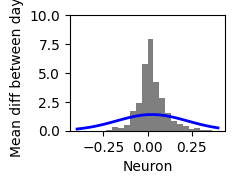

In [61]:
from matplotlib.gridspec import GridSpec as gs
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster import hierarchy
ses = data_dict['data']['session']
mouse = data_dict['data']['mouse']
keepses = [11,12]#[s != None for s in ses]
mouseold = mouse[3]
Fpre = data_dict['data']['F'][keepses[0]]
neuronold = int(data_dict['data']['conditioned_neuron'][keepses[0]]-1)
testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
rowplot = -1
colplot = 0
fig = plt.figure(figsize = [2,1.5])
session = keepses[1]
Fpre = data_dict['data']['F'][session]
neuron = int(data_dict['data']['conditioned_neuron'][session]-1)
test = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
test2 = test-np.mean(test[:,0:45], axis = 1)[:, None]
#ax.plot([0,250], [order[neuron], order[neuron]], '--m')
if mouse[i] == mouseold:
  diffFR = np.mean(test2-testold2, axis = 1)
  spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
  plt.hist(np.sort(diffFR), bins = np.linspace(-0.4, 0.4, 25), histtype = 'stepfilled', color='k', label = 'Sparsity =' + str(np.round(spar,3)), alpha = 0.5, density = True)
  neurank = np.where(order == neuron)[0]
  neurankold = np.where(order == neuronold)[0]
  diffFRm = np.random.normal(np.mean(diffFR),np.std(diffFR), [7000,1]).ravel()
  spar = 1-((np.sum(diffFRm**2)/(np.sum(np.abs(diffFRm))**2))**-1/diffFRm.shape[0])
  xtemp = np.linspace(-0.4, 0.4, 25)
  plt.plot(xtemp, 1/np.sqrt((np.std(diffFR)*2*np.pi))*np.exp(-(xtemp-np.mean(diffFR))**2/(np.std(diffFR))), 'b', lw = 2, label='Sparsity of Null =' + str(np.round(spar,3)))
  #plt.hist(np.sort(diffFRm), bins = np.linspace(-0.4, 0.4, 25), histtype = 'step', color='y', label = 'Sparsity of Null =' + str(np.round(spar,3)), alpha = 1, density = True)
  #ax.plot([neurank], diffFR[order][neurank], '*m', label='CN, Day 2', markersize = 10)
  #ax.plot([neurankold], diffFR[order][neurankold], '*r', label = 'CN, Day 1', markersize = 10)
  plt.xlabel('Neuron')
  plt.ylim([0,10])
  plt.ylabel('Mean diff between days')

Fpre = data_dict['data']['F'][session]
neuronold = int(data_dict['data']['conditioned_neuron'][session]-1)
testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
mouseold = mouse[i]
  #ax.set_ylabel('Number of time steps in Pretrial')
  #ax.set_xlabel('Trial Count')
#plt.legend(loc='best')
plt.savefig('sparsityNormal_sessions11_12.svg')
plt.show()

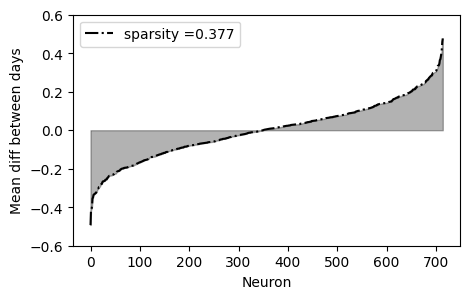

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

diffFR = np.random.normal(0,0.15, [715,1]).ravel()

fig,ax = plt.subplots(1,1,figsize = [5,3])
spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
ax.plot(range(diffFR.shape[0]), np.sort(diffFR), '-.k', label = 'sparsity =' + str(np.round(spar,3)))
order = np.argsort(diffFR)
ax.fill_between(range(diffFR.shape[0]), 0*diffFR, diffFR[order], color='k', alpha = 0.3)
ax.set_ylim([-0.6,0.6])
ax.set_xlabel('Neuron')
ax.set_ylabel('Mean diff between days')
ax.legend(loc='best')
plt.show()

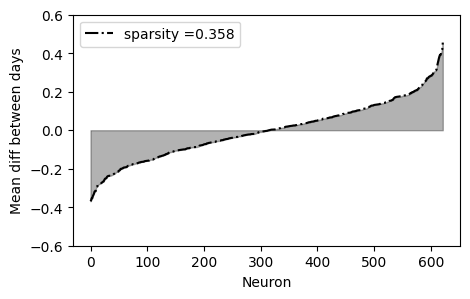

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

diffFR = np.random.normal(0,0.15, [622,1]).ravel()

fig,ax = plt.subplots(1,1,figsize = [5,3])
spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
ax.plot(range(diffFR.shape[0]), np.sort(diffFR), '-.k', label = 'sparsity =' + str(np.round(spar,3)))
order = np.argsort(diffFR)
ax.fill_between(range(diffFR.shape[0]), 0*diffFR, diffFR[order], color='k', alpha = 0.3)
ax.set_ylim([-0.6,0.6])
ax.set_xlabel('Neuron')
ax.set_ylabel('Mean diff between days')
ax.legend(loc='best')
plt.show()

/tmp/ipykernel_67/4037426149.py:33: RuntimeWarning: invalid value encountered in scalar divide
  spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])


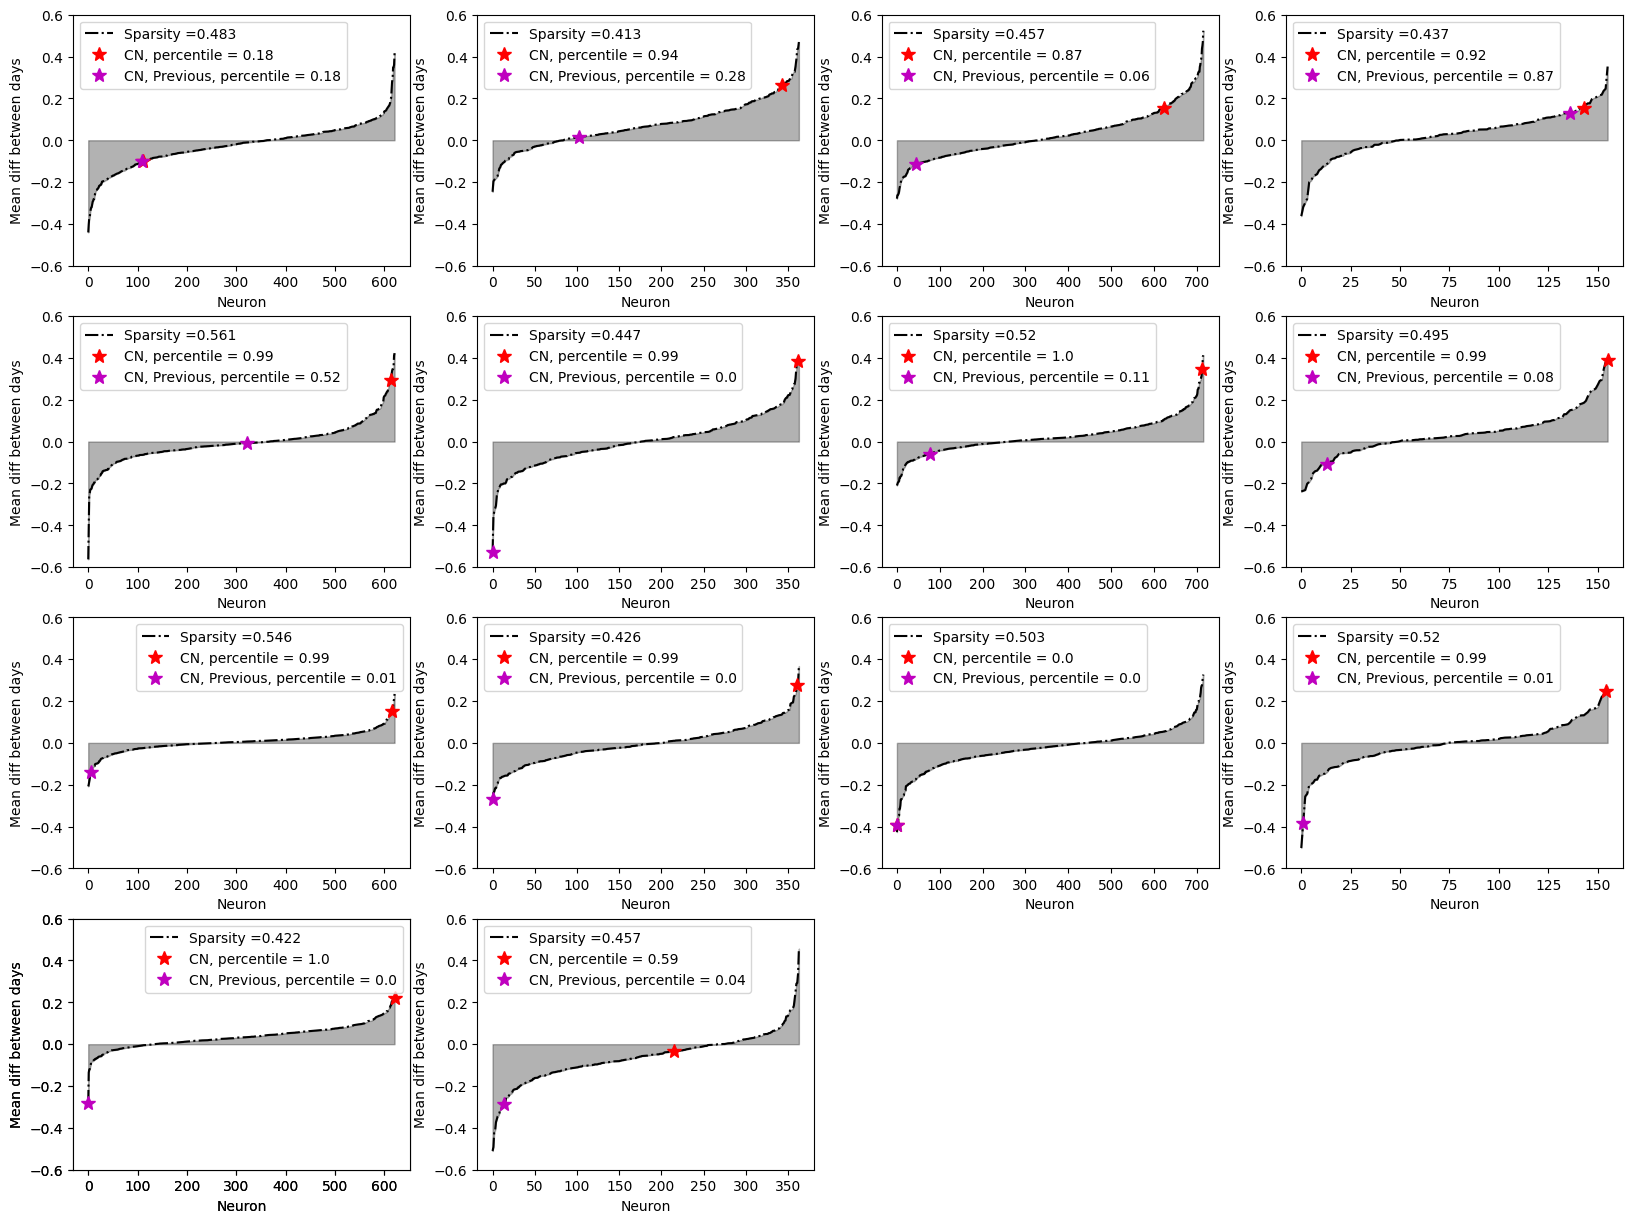

In [7]:
from matplotlib.gridspec import GridSpec as gs
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster import hierarchy
ses = data_dict['data']['session']
mouse = data_dict['data']['mouse']
keepses = [s != None for s in ses]
mouseold = mouse[0]
Fpre = data_dict['data']['F'][0]
neuronold = int(data_dict['data']['conditioned_neuron'][0]-1)
testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
rowplot = -1
colplot = 0
fig = plt.figure(figsize = [20,15])
gsx = gs(nrows = 4, ncols = 4, figure=fig)
for i in range(len(keepses)):
  if keepses[i]:
    session = i
    if mouse[i] == mouseold:
      rowplot += 1
    else:
      rowplot = 0
      colplot += 1
    session = i
    Fpre = data_dict['data']['F'][session]
    neuron = int(data_dict['data']['conditioned_neuron'][session]-1)
    test = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    test2 = test-np.mean(test[:,0:45], axis = 1)[:, None]
    #ax.plot([0,250], [order[neuron], order[neuron]], '--m')
    if mouse[i] == mouseold:
      ax = fig.add_subplot(gsx[rowplot-1, colplot+0])
      diffFR = np.mean(test2-testold2, axis = 1)
      spar = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
      perc = np.sum(diffFR[neuron] > diffFR)/diffFR.shape[0]
      ax.plot(range(diffFR.shape[0]), np.sort(diffFR), '-.k', label = 'Sparsity =' + str(np.round(spar,3)))
      order = np.argsort(diffFR)
      ax.fill_between(range(diffFR.shape[0]), 0*diffFR, diffFR[order], color='k', alpha = 0.3)
      neurank = np.where(order == neuron)[0]
      neurankold = np.where(order == neuronold)[0]
      ax.plot([neurank], diffFR[order][neurank], '*r', label='CN, percentile = ' + str(np.round(neurank[0]/order.shape[0], 2)), markersize = 10)
      ax.plot([neurankold], diffFR[order][neurankold], '*m', label = 'CN, Previous, percentile = '+ str(np.round(neurankold[0]/order.shape[0], 2)), markersize = 10)
      ax.set_ylim([-0.6,0.6])
      ax.set_xlabel('Neuron')
      ax.set_ylabel('Mean diff between days')
      ax.legend(loc='best')

    Fpre = data_dict['data']['F'][session]
    neuronold = int(data_dict['data']['conditioned_neuron'][session]-1)
    testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
    mouseold = mouse[i]
  #ax.set_ylabel('Number of time steps in Pretrial')
  #ax.set_xlabel('Trial Count')

plt.show()

In [ ]:
from matplotlib.gridspec import GridSpec as gs
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster import hierarchy
ses = data_dict['data']['session']
mouse = data_dict['data']['mouse']
keepses = [s != None for s in ses]
mouseold = mouse[0]
Fpre = data_dict['data']['F'][0]
neuronold = int(data_dict['data']['conditioned_neuron'][0]-1)
testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
rowplot = -1
colplot = 0
fig = plt.figure(figsize = [20,15])
gsx = gs(nrows = 4, ncols = 4, figure=fig)
for i in range(len(keepses)):
  if keepses[i]:
    session = i
    if mouse[i] == mouseold:
      rowplot += 1
    else:
      rowplot = 0
      colplot += 1
    session = i
    Fpre = data_dict['data']['F'][session]
    neuron = int(data_dict['data']['conditioned_neuron'][session]-1)
    test = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    test2 = test-np.mean(test[:,0:45], axis = 1)[:, None]
    #ax.plot([0,250], [order[neuron], order[neuron]], '--m')
    if mouse[i] == mouseold:
      ax = fig.add_subplot(gsx[rowplot-1, colplot+0])
      diffFR = np.mean(test2-testold2, axis = 1)
      spar = (np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0]
      ax.plot(range(diffFR.shape[0]), np.sort(diffFR), '-.k', label = 'sparsity =' + str(np.round(spar,3)))
      order = np.argsort(diffFR)
      ax.fill_between(range(diffFR.shape[0]), 0*diffFR, diffFR[order], color='k', alpha = 0.3)
      neurank = np.where(order == neuron)[0]
      neurankold = np.where(order == neuronold)[0]
      ax.plot([neurank], diffFR[order][neurank], '*r', label='CN', markersize = 10)
      ax.plot([neurankold], diffFR[order][neurankold], '*m', label = 'CN, Day Previous', markersize = 10)
      ax.set_ylim([-0.6,0.6])
      ax.set_xlabel('Neuron')
      ax.set_ylabel('Mean diff between days')
      ax.legend(loc='best')

    Fpre = data_dict['data']['F'][session]
    neuronold = int(data_dict['data']['conditioned_neuron'][session]-1)
    testold = np.nanmean(Fpre - Fpre[0,:,:][None, :,:], axis = 2).T
    testold2 = testold-np.mean(testold[:,0:45], axis = 1)[:, None]
    mouseold = mouse[i]
  #ax.set_ylabel('Number of time steps in Pretrial')
  #ax.set_xlabel('Trial Count')

plt.show()

## Sparsity is dependent upon amplitude?

/tmp/ipykernel_249/4106649888.py:12: RuntimeWarning: invalid value encountered in scalar divide
  spar[i,r] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


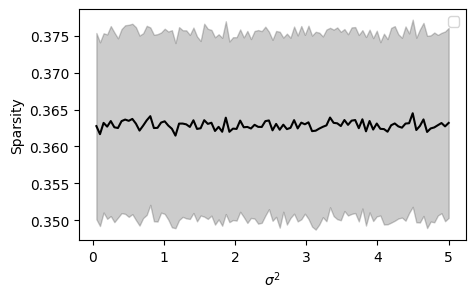

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

reps = 500
sigmas = np.linspace(0,5,100)
spar = np.zeros(sigmas.shape)[:,None]*np.ones([1,reps])

for r in range(reps):
    for i, sig in enumerate(sigmas):
        diffFR = np.random.normal(0,sig, [715,1]).ravel()
        spar[i,r] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])

fig,ax = plt.subplots(1,1,figsize = [5,3])
ax.fill_between(sigmas, np.mean(spar,axis = 1)-np.std(spar,axis = 1), np.mean(spar,axis = 1)+np.std(spar,axis = 1), color = 'k', alpha = 0.2)
ax.plot(sigmas, np.mean(spar,axis = 1), 'k')
ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('Sparsity')
ax.legend(loc='best')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


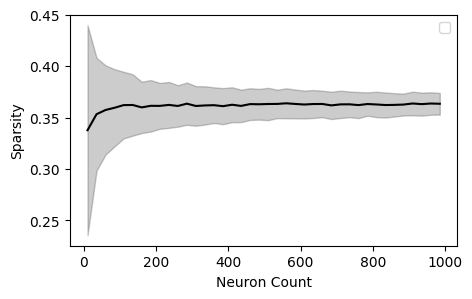

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

reps = 500
numbers = np.arange(10,1000,25)
spar = np.zeros(numbers.shape)[:,None]*np.ones([1,reps])

for r in range(reps):
    for i, num in enumerate(numbers):
        diffFR = np.random.normal(0,1, [num,1]).ravel()
        spar[i,r] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])

fig,ax = plt.subplots(1,1,figsize = [5,3])
ax.fill_between(numbers, np.mean(spar,axis = 1)-np.std(spar,axis = 1), np.mean(spar,axis = 1)+np.std(spar,axis = 1), color = 'k', alpha = 0.2)
ax.plot(numbers, np.mean(spar,axis = 1), 'k')
ax.set_xlabel('Neuron Count')
ax.set_ylabel('Sparsity')
ax.legend(loc='best')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


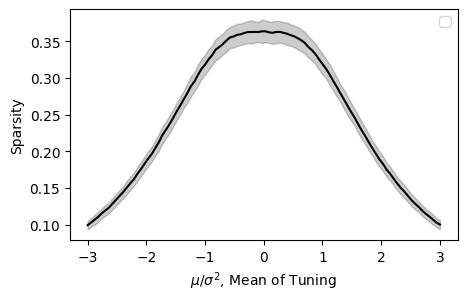

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

reps = 500
mus = np.linspace(-3,3,100)
spar = np.zeros(mus.shape)[:,None]*np.ones([1,reps])

for r in range(reps):
    for i, mu in enumerate(mus):
        diffFR = np.random.normal(mu,1, [500,1]).ravel()
        spar[i,r] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])

fig,ax = plt.subplots(1,1,figsize = [5,3])
ax.fill_between(mus, np.mean(spar,axis = 1)-np.std(spar,axis = 1), np.mean(spar,axis = 1)+np.std(spar,axis = 1), color = 'k', alpha = 0.2)
ax.plot(mus, np.mean(spar,axis = 1), 'k')
ax.set_xlabel('$\mu/\sigma^2$, Mean of Tuning')
ax.set_ylabel('Sparsity')
ax.legend(loc='best')
plt.show()

In [21]:
!pip install -q scipy

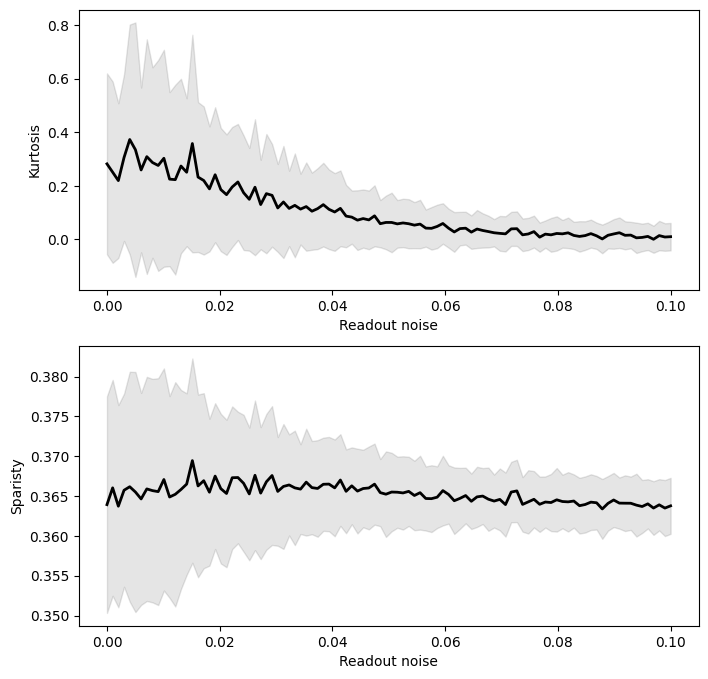

In [24]:
import numpy as np
from matplotlib import mlab
from matplotlib import pylab as plt
from scipy import signal
from scipy.stats import norm, kurtosis, skew
%matplotlib inline

timesteps = 10000
neurons = 600
tau = 20
readoutnoise = 0.0

ntostudy = 100
replicates = 100
noises = np.linspace(0,0.1, ntostudy)
kurt = np.zeros([ntostudy,replicates])
skew1 = np.zeros(kurt.shape)
spar = np.zeros(kurt.shape)

for j in range(replicates):
    for i, rnoise in enumerate(noises):
        spikes = np.random.poisson(lam=0.1, size=timesteps)
        win = signal.windows.exponential(10*tau,center=tau/2, tau = tau, sym=False)
        filtered = signal.convolve(spikes, win, mode='same') / sum(win) + np.random.normal(0,rnoise,spikes.shape)

        dfoverf = (filtered - np.mean(filtered))/(np.mean(filtered))
        kurt[i, j] = kurtosis(dfoverf)
        skew1[i,j] = skew(dfoverf)
        diffFR = dfoverf
        spar[i,j] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])

fig, ax = plt.subplots(2,1,figsize = [8,8])
kurtmean = np.mean(kurt, axis = 1)
kurtstd = np.std(kurt, axis = 1)
ax[0].fill_between(noises, kurtmean-kurtstd, kurtmean+kurtstd, color='k', alpha = 0.1)
ax[0].plot(noises, kurtmean, color='k', lw = 2)
ax[0].set_xlabel('Readout noise')
ax[0].set_ylabel('Kurtosis')

skewmean = np.mean(spar, axis = 1)
skewstd = np.std(spar, axis = 1)
ax[1].fill_between(noises, skewmean-skewstd, skewmean+skewstd, color='k', alpha = 0.1)
ax[1].plot(noises, skewmean, color='k', lw = 2)
ax[1].set_xlabel('Readout noise')
ax[1].set_ylabel('Sparisty')
plt.show()  

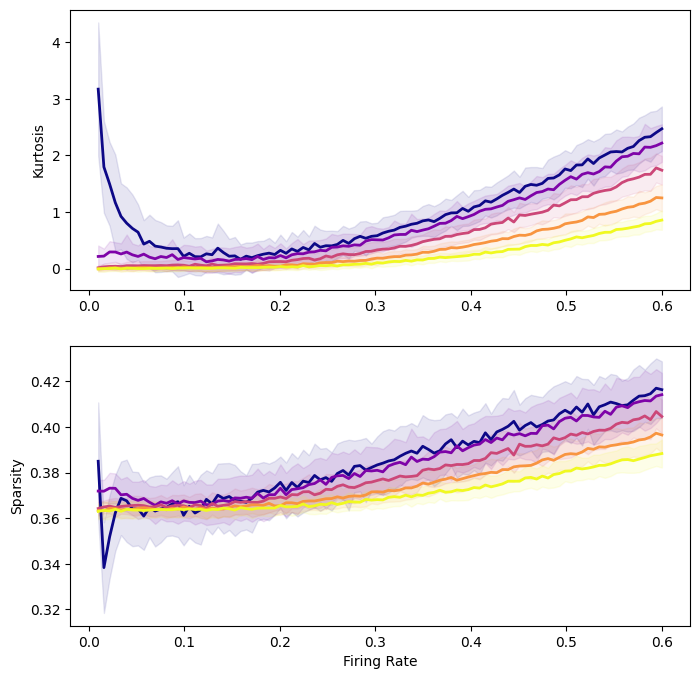

In [25]:
import matplotlib.cm as cm
import numpy as np
from matplotlib import mlab
from matplotlib import pylab as plt
from scipy import signal
from scipy.stats import norm, kurtosis
%matplotlib inline

timesteps = 10000
neurons = 600
tau = 20
readoutnoise = 0.05

ntostudy = 100
replicates = 100
nnoises = 5

cmap = cm.plasma(np.linspace(0,1,nnoises))

noises = np.linspace(0,0.1, nnoises)
kurt = np.zeros([ntostudy,replicates, nnoises])
skew1 = np.zeros(kurt.shape)
spar = np.zeros(kurt.shape)
FRs = np.linspace(0.01,0.6, ntostudy)
fig, ax = plt.subplots(2,1,figsize = [8,8])

for k, nn in enumerate(noises):
    for j in range(replicates):
        for i, FR in enumerate(FRs):
            spikes = np.random.poisson(lam=FR, size=timesteps)
            win = signal.windows.exponential(10*tau,center=tau/2, tau = tau, sym=False)
            filtered = signal.convolve(spikes, win, mode='same') / sum(win) + np.random.normal(0,nn,spikes.shape)

            dfoverf = (filtered - np.mean(filtered))/(np.mean(filtered))
            kurt[i, j, k] = kurtosis(dfoverf)
            skew1[i, j, k] = skew(dfoverf)
            diffFR = dfoverf
            spar[i,j,k] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
    kurtmean = np.mean(kurt[:,:,k], axis = 1)
    kurtstd = np.std(kurt[:,:,k], axis = 1)
    ax[0].fill_between(FRs, kurtmean-kurtstd, kurtmean+kurtstd, color=cmap[k,:], alpha = 0.1)
    ax[0].plot(FRs, kurtmean, color=cmap[k,:], lw =2)
    skewmean = np.mean(spar[:,:,k], axis = 1)
    skewstd = np.std(spar[:,:,k], axis = 1)
    ax[1].fill_between(FRs, skewmean-skewstd, skewmean+skewstd, color=cmap[k,:], alpha = 0.1)
    ax[1].plot(FRs, skewmean, color=cmap[k,:], lw = 2)
ax[1].set_xlabel('Firing Rate')
ax[0].set_ylabel('Kurtosis')
ax[1].set_ylabel('Sparsity')
plt.show()  

/tmp/ipykernel_249/1479877507.py:34: RuntimeWarning: invalid value encountered in divide
  dfoverf = (filtered - np.mean(filtered))/(np.mean(filtered))


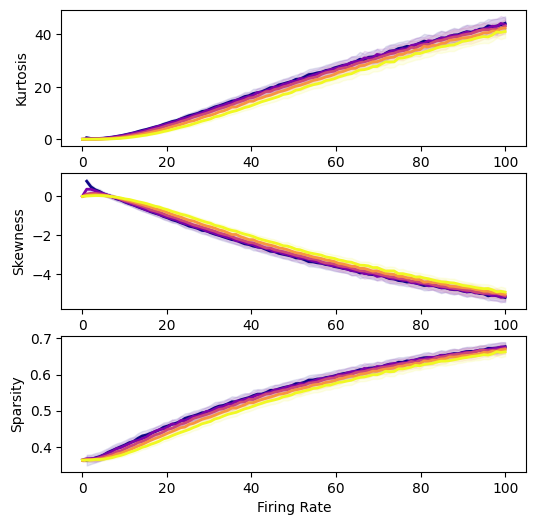

In [28]:
import matplotlib.cm as cm
import numpy as np
from matplotlib import mlab
from matplotlib import pylab as plt
from scipy import signal
from scipy.stats import norm, kurtosis
%matplotlib inline

timesteps = 10000
neurons = 600
tau = 20
readoutnoise = 0.05

ntostudy = 100
replicates = 100
nnoises = 5

cmap = cm.plasma(np.linspace(0,1,nnoises))

noises = np.linspace(0,0.1, nnoises)
kurt = np.zeros([ntostudy,replicates, nnoises])
skew1 = np.zeros(kurt.shape)
spar = np.zeros(kurt.shape)
FRs = np.linspace(0.01,100, ntostudy)
fig, ax = plt.subplots(3,1,figsize = [6,6])

for k, nn in enumerate(noises):
    for j in range(replicates):
        for i, FR in enumerate(FRs):
            spikes = np.random.poisson(lam=FR/20, size=timesteps)
            win = signal.windows.exponential(10*tau,center=tau/2, tau = tau, sym=False)
            filtered = signal.convolve(spikes, win, mode='same') / sum(win) + np.random.normal(0,nn,spikes.shape)

            dfoverf = (filtered - np.mean(filtered))/(np.mean(filtered))
            kurt[i, j, k] = kurtosis(dfoverf)
            skew1[i, j, k] = skew(dfoverf)
            diffFR = dfoverf
            spar[i,j,k] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
    kurtmean = np.mean(kurt[:,:,k], axis = 1)
    kurtstd = np.std(kurt[:,:,k], axis = 1)
    ax[0].fill_between(FRs, kurtmean-kurtstd, kurtmean+kurtstd, color=cmap[k,:], alpha = 0.1)
    ax[0].plot(FRs, kurtmean, color=cmap[k,:], lw =2)
    skewmean = np.mean(skew1[:,:,k], axis = 1)
    skewstd = np.std(skew1[:,:,k], axis = 1)
    ax[1].fill_between(FRs, skewmean-skewstd, skewmean+skewstd, color=cmap[k,:], alpha = 0.1)
    ax[1].plot(FRs, skewmean, color=cmap[k,:], lw = 2)
    skewmean = np.mean(spar[:,:,k], axis = 1)
    skewstd = np.std(spar[:,:,k], axis = 1)
    ax[2].fill_between(FRs, skewmean-skewstd, skewmean+skewstd, color=cmap[k,:], alpha = 0.1)
    ax[2].plot(FRs, skewmean, color=cmap[k,:], lw = 2)
ax[2].set_xlabel('Firing Rate')
ax[0].set_ylabel('Kurtosis')
ax[1].set_ylabel('Skewness')
ax[2].set_ylabel('Sparsity')
plt.show()  

/tmp/ipykernel_249/4046601159.py:34: RuntimeWarning: divide by zero encountered in divide
  dfoverf = (filtered - np.median(filtered))/(np.median(filtered))
/tmp/ipykernel_249/4046601159.py:34: RuntimeWarning: invalid value encountered in divide
  dfoverf = (filtered - np.median(filtered))/(np.median(filtered))


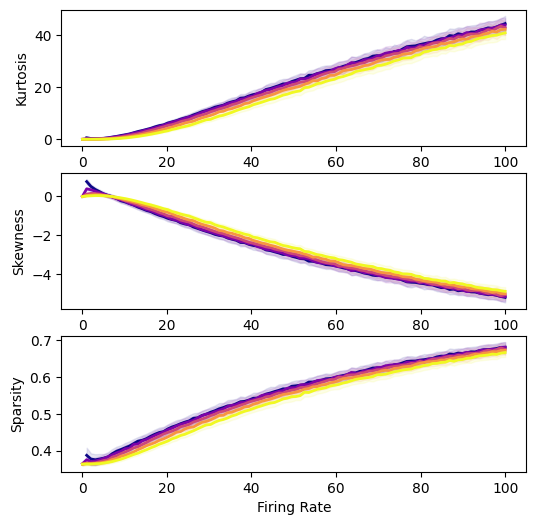

In [29]:
import matplotlib.cm as cm
import numpy as np
from matplotlib import mlab
from matplotlib import pylab as plt
from scipy import signal
from scipy.stats import norm, kurtosis
%matplotlib inline

timesteps = 10000
neurons = 600
tau = 20
readoutnoise = 0.05

ntostudy = 100
replicates = 100
nnoises = 5

cmap = cm.plasma(np.linspace(0,1,nnoises))

noises = np.linspace(0,0.1, nnoises)
kurt = np.zeros([ntostudy,replicates, nnoises])
skew1 = np.zeros(kurt.shape)
spar = np.zeros(kurt.shape)
FRs = np.linspace(0.01,100, ntostudy)
fig, ax = plt.subplots(3,1,figsize = [6,6])

for k, nn in enumerate(noises):
    for j in range(replicates):
        for i, FR in enumerate(FRs):
            spikes = np.random.poisson(lam=FR/20, size=timesteps)
            win = signal.windows.exponential(10*tau,center=tau/2, tau = tau, sym=False)
            filtered = signal.convolve(spikes, win, mode='same') / sum(win) + np.random.normal(0,nn,spikes.shape)

            dfoverf = (filtered - np.median(filtered))/(np.median(filtered))
            kurt[i, j, k] = kurtosis(dfoverf)
            skew1[i, j, k] = skew(dfoverf)
            diffFR = dfoverf
            spar[i,j,k] = 1-((np.sum(diffFR**2)/(np.sum(np.abs(diffFR))**2))**-1/diffFR.shape[0])
    kurtmean = np.mean(kurt[:,:,k], axis = 1)
    kurtstd = np.std(kurt[:,:,k], axis = 1)
    ax[0].fill_between(FRs, kurtmean-kurtstd, kurtmean+kurtstd, color=cmap[k,:], alpha = 0.1)
    ax[0].plot(FRs, kurtmean, color=cmap[k,:], lw =2)
    skewmean = np.mean(skew1[:,:,k], axis = 1)
    skewstd = np.std(skew1[:,:,k], axis = 1)
    ax[1].fill_between(FRs, skewmean-skewstd, skewmean+skewstd, color=cmap[k,:], alpha = 0.1)
    ax[1].plot(FRs, skewmean, color=cmap[k,:], lw = 2)
    skewmean = np.mean(spar[:,:,k], axis = 1)
    skewstd = np.std(spar[:,:,k], axis = 1)
    ax[2].fill_between(FRs, skewmean-skewstd, skewmean+skewstd, color=cmap[k,:], alpha = 0.1)
    ax[2].plot(FRs, skewmean, color=cmap[k,:], lw = 2)
ax[2].set_xlabel('Firing Rate')
ax[0].set_ylabel('Kurtosis')
ax[1].set_ylabel('Skewness')
ax[2].set_ylabel('Sparsity')
plt.show()  